# IRAT Figures - All Sequences (H1- and H3- Strains Only)

In [1]:
# basic imports
import os 
import numpy as np
import pandas as pd
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# visualization
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 300

def save_fig(filename, AXIS=False):
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
    plt.margins(0,0)
    if not AXIS:
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
    plt.savefig(filename, dpi=300, bbox_inches = 'tight', pad_inches = 0, transparent=True) 
    return

In [2]:
df = pd.read_csv('results/irat_average_qdistances_all_sequences.csv')

# filter by positive average qdistances
df[df['Both Average Qdistance'] > 0].corr()

,Potential Emergence Estimate,Potential Impact Estimate,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance
Potential Emergence Estimate,1.000000,0.903205,-0.473946,0.628172,0.066661,-0.184776,0.054460
Potential Impact Estimate,0.903205,1.000000,-0.720432,0.711279,0.316851,0.100010,0.321741
HA Qnet Sample,-0.473946,-0.720432,1.000000,-0.612372,-0.765165,-0.421487,-0.788544
NA Qnet Sample,0.628172,0.711279,-0.612372,1.000000,-0.039973,0.626668,0.000505
HA Average Qdistance,0.066661,0.316851,-0.765165,-0.039973,1.000000,0.043402,0.997936
NA Average Qdistance,-0.184776,0.100010,-0.421487,0.626668,0.043402,1.000000,0.107473
Both Average Qdistance,0.054460,0.321741,-0.788544,0.000505,0.997936,0.107473,1.000000


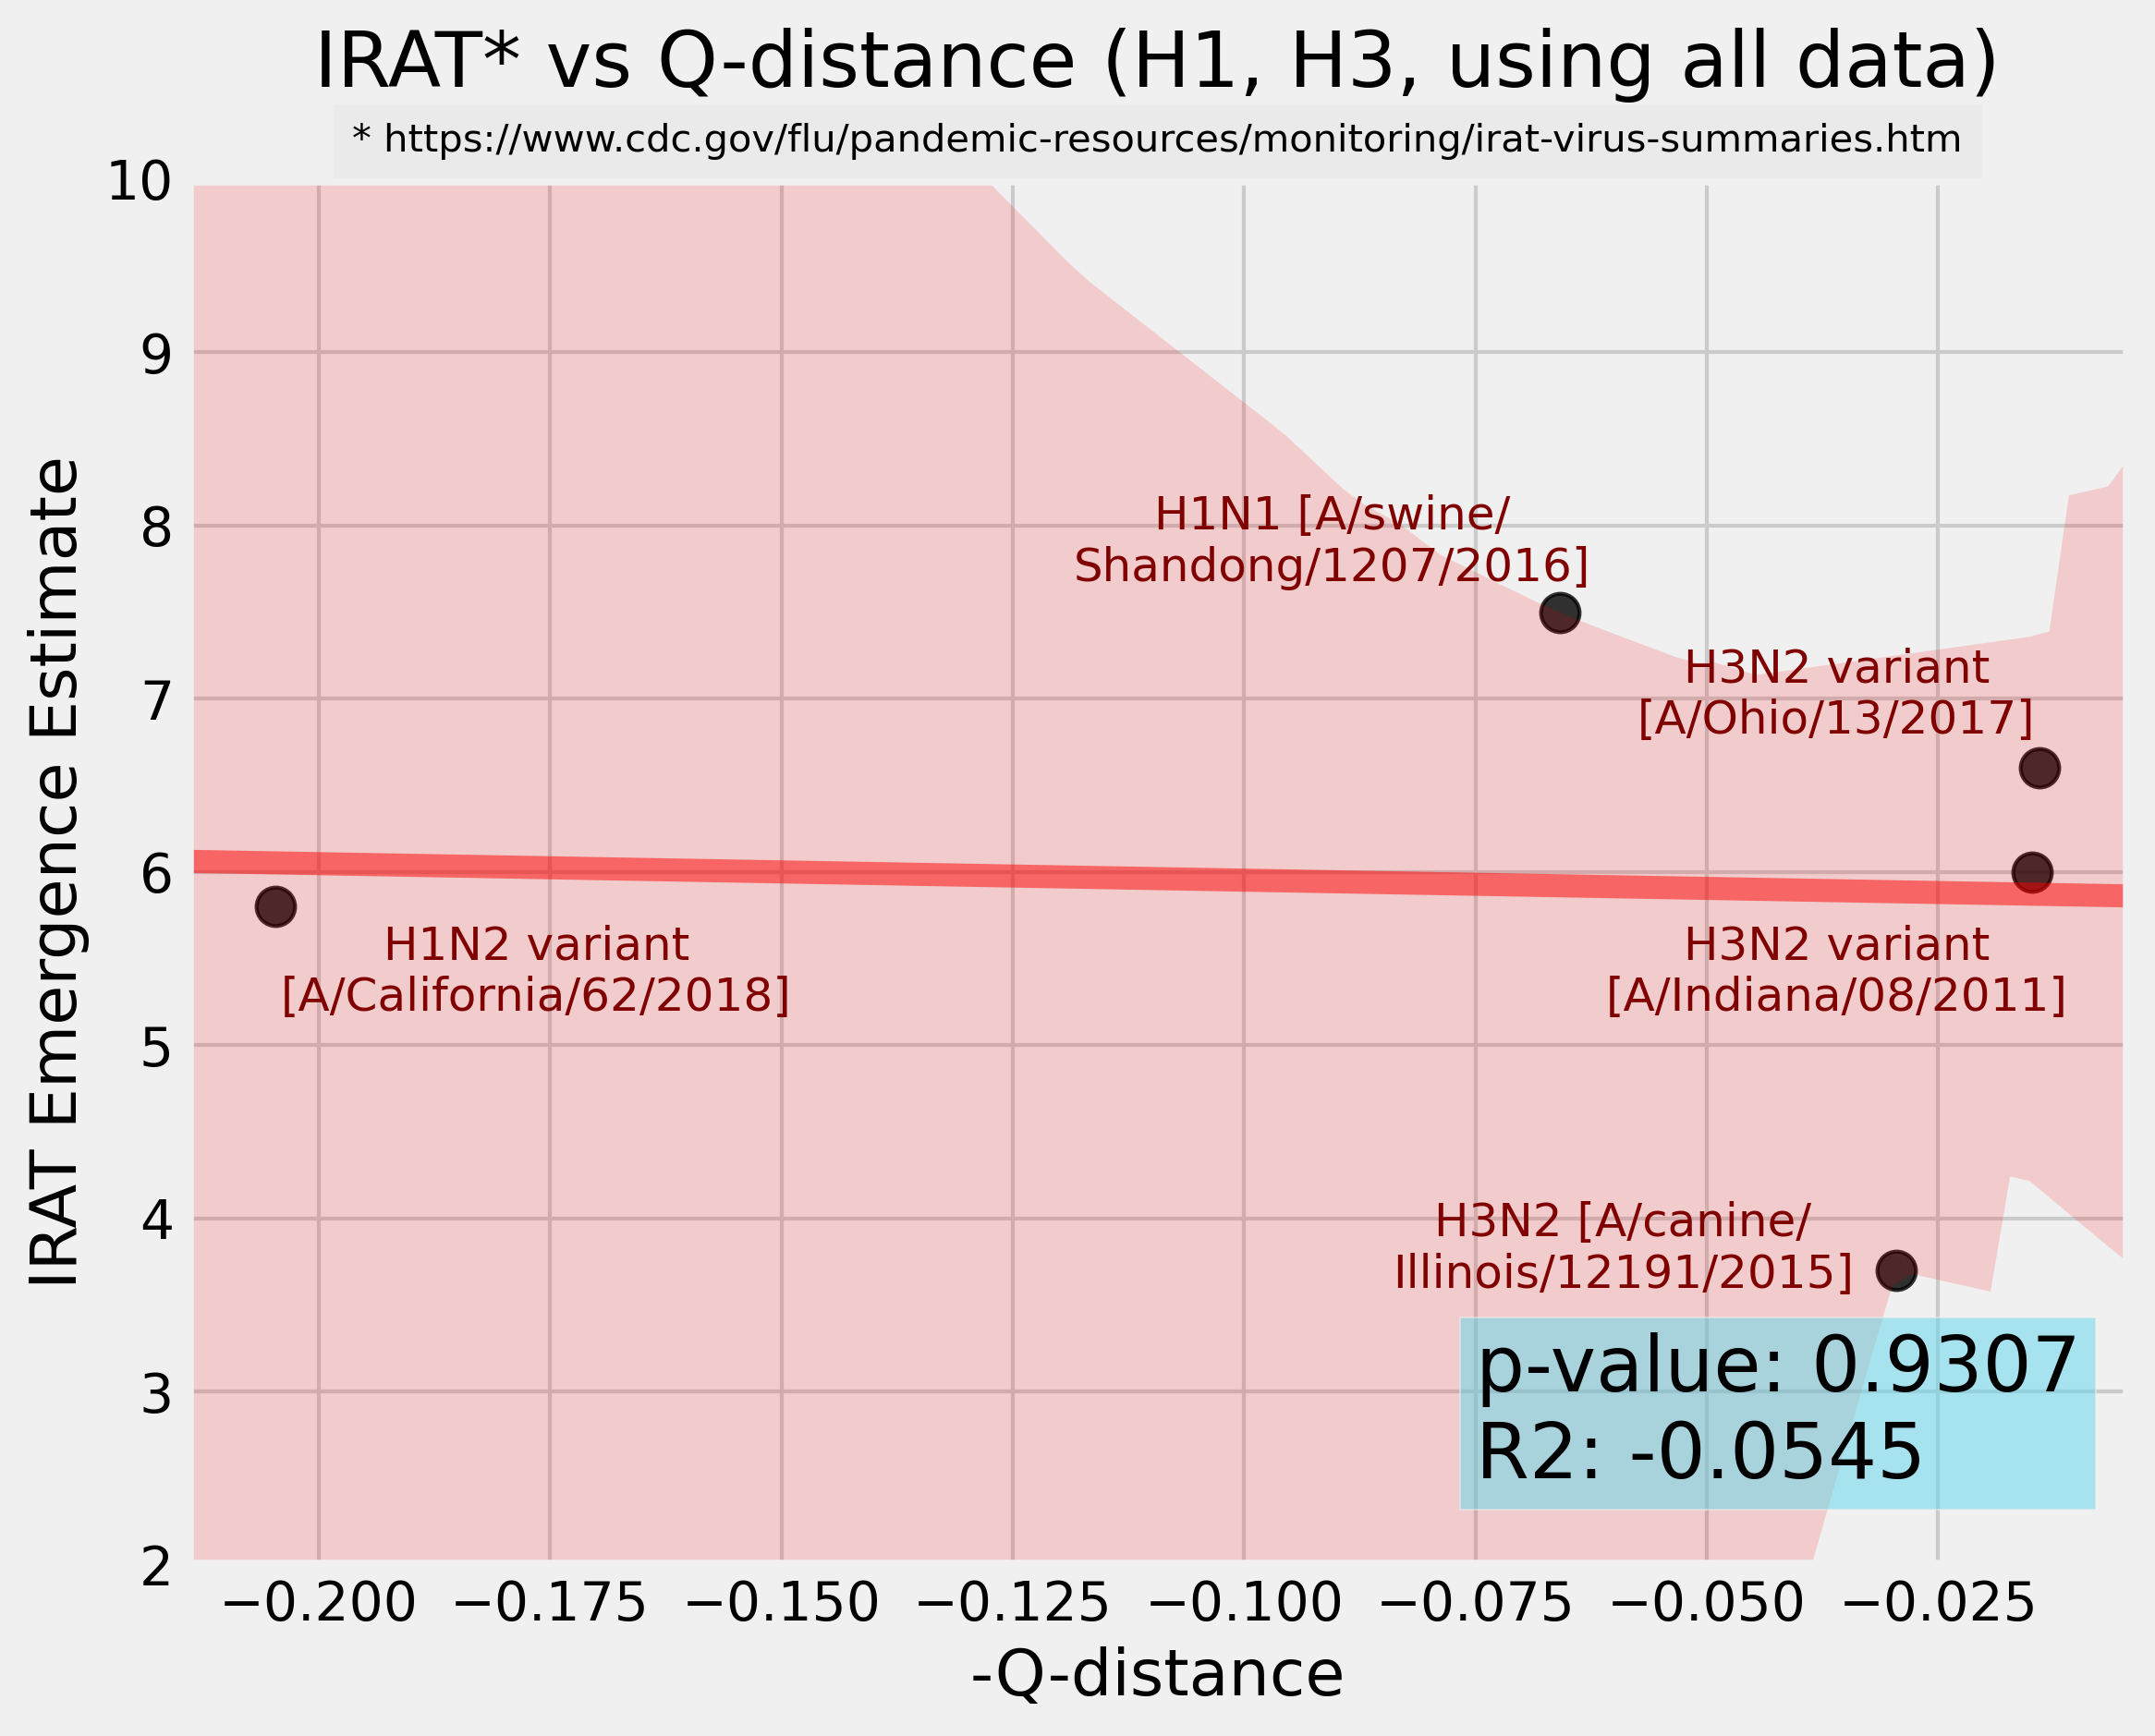

In [3]:
X = df[df['Both Average Qdistance'] > 0]['Both Average Qdistance']
Y = df[df['Both Average Qdistance'] > 0]['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.075, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (H1, H3, using all data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=10, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.74, 0.2, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.18, 0.4, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.4, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.6, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_all_sequences',AXIS=True)

In [4]:
coords_df = df[['Influenza Virus','Virus Type','Both Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['Both Average Qdistance'] = -coords_df['Both Average Qdistance']
coords_df.iloc[1:]

,Influenza Virus,Virus Type,Both Average Qdistance,Potential Emergence Estimate
5,A/canine/Illinois/12191/2015,H3N2,-0.029554,3.7
2,A/California/62/2018,H1N2,-0.204683,5.8
4,A/Indiana/08/2011,H3N2,-0.014846,6.0
3,A/Ohio/13/2017,H3N2,-0.014037,6.6
0,A/swine/Shandong/1207/2016,H1N1,-0.065871,7.5


## HA Only

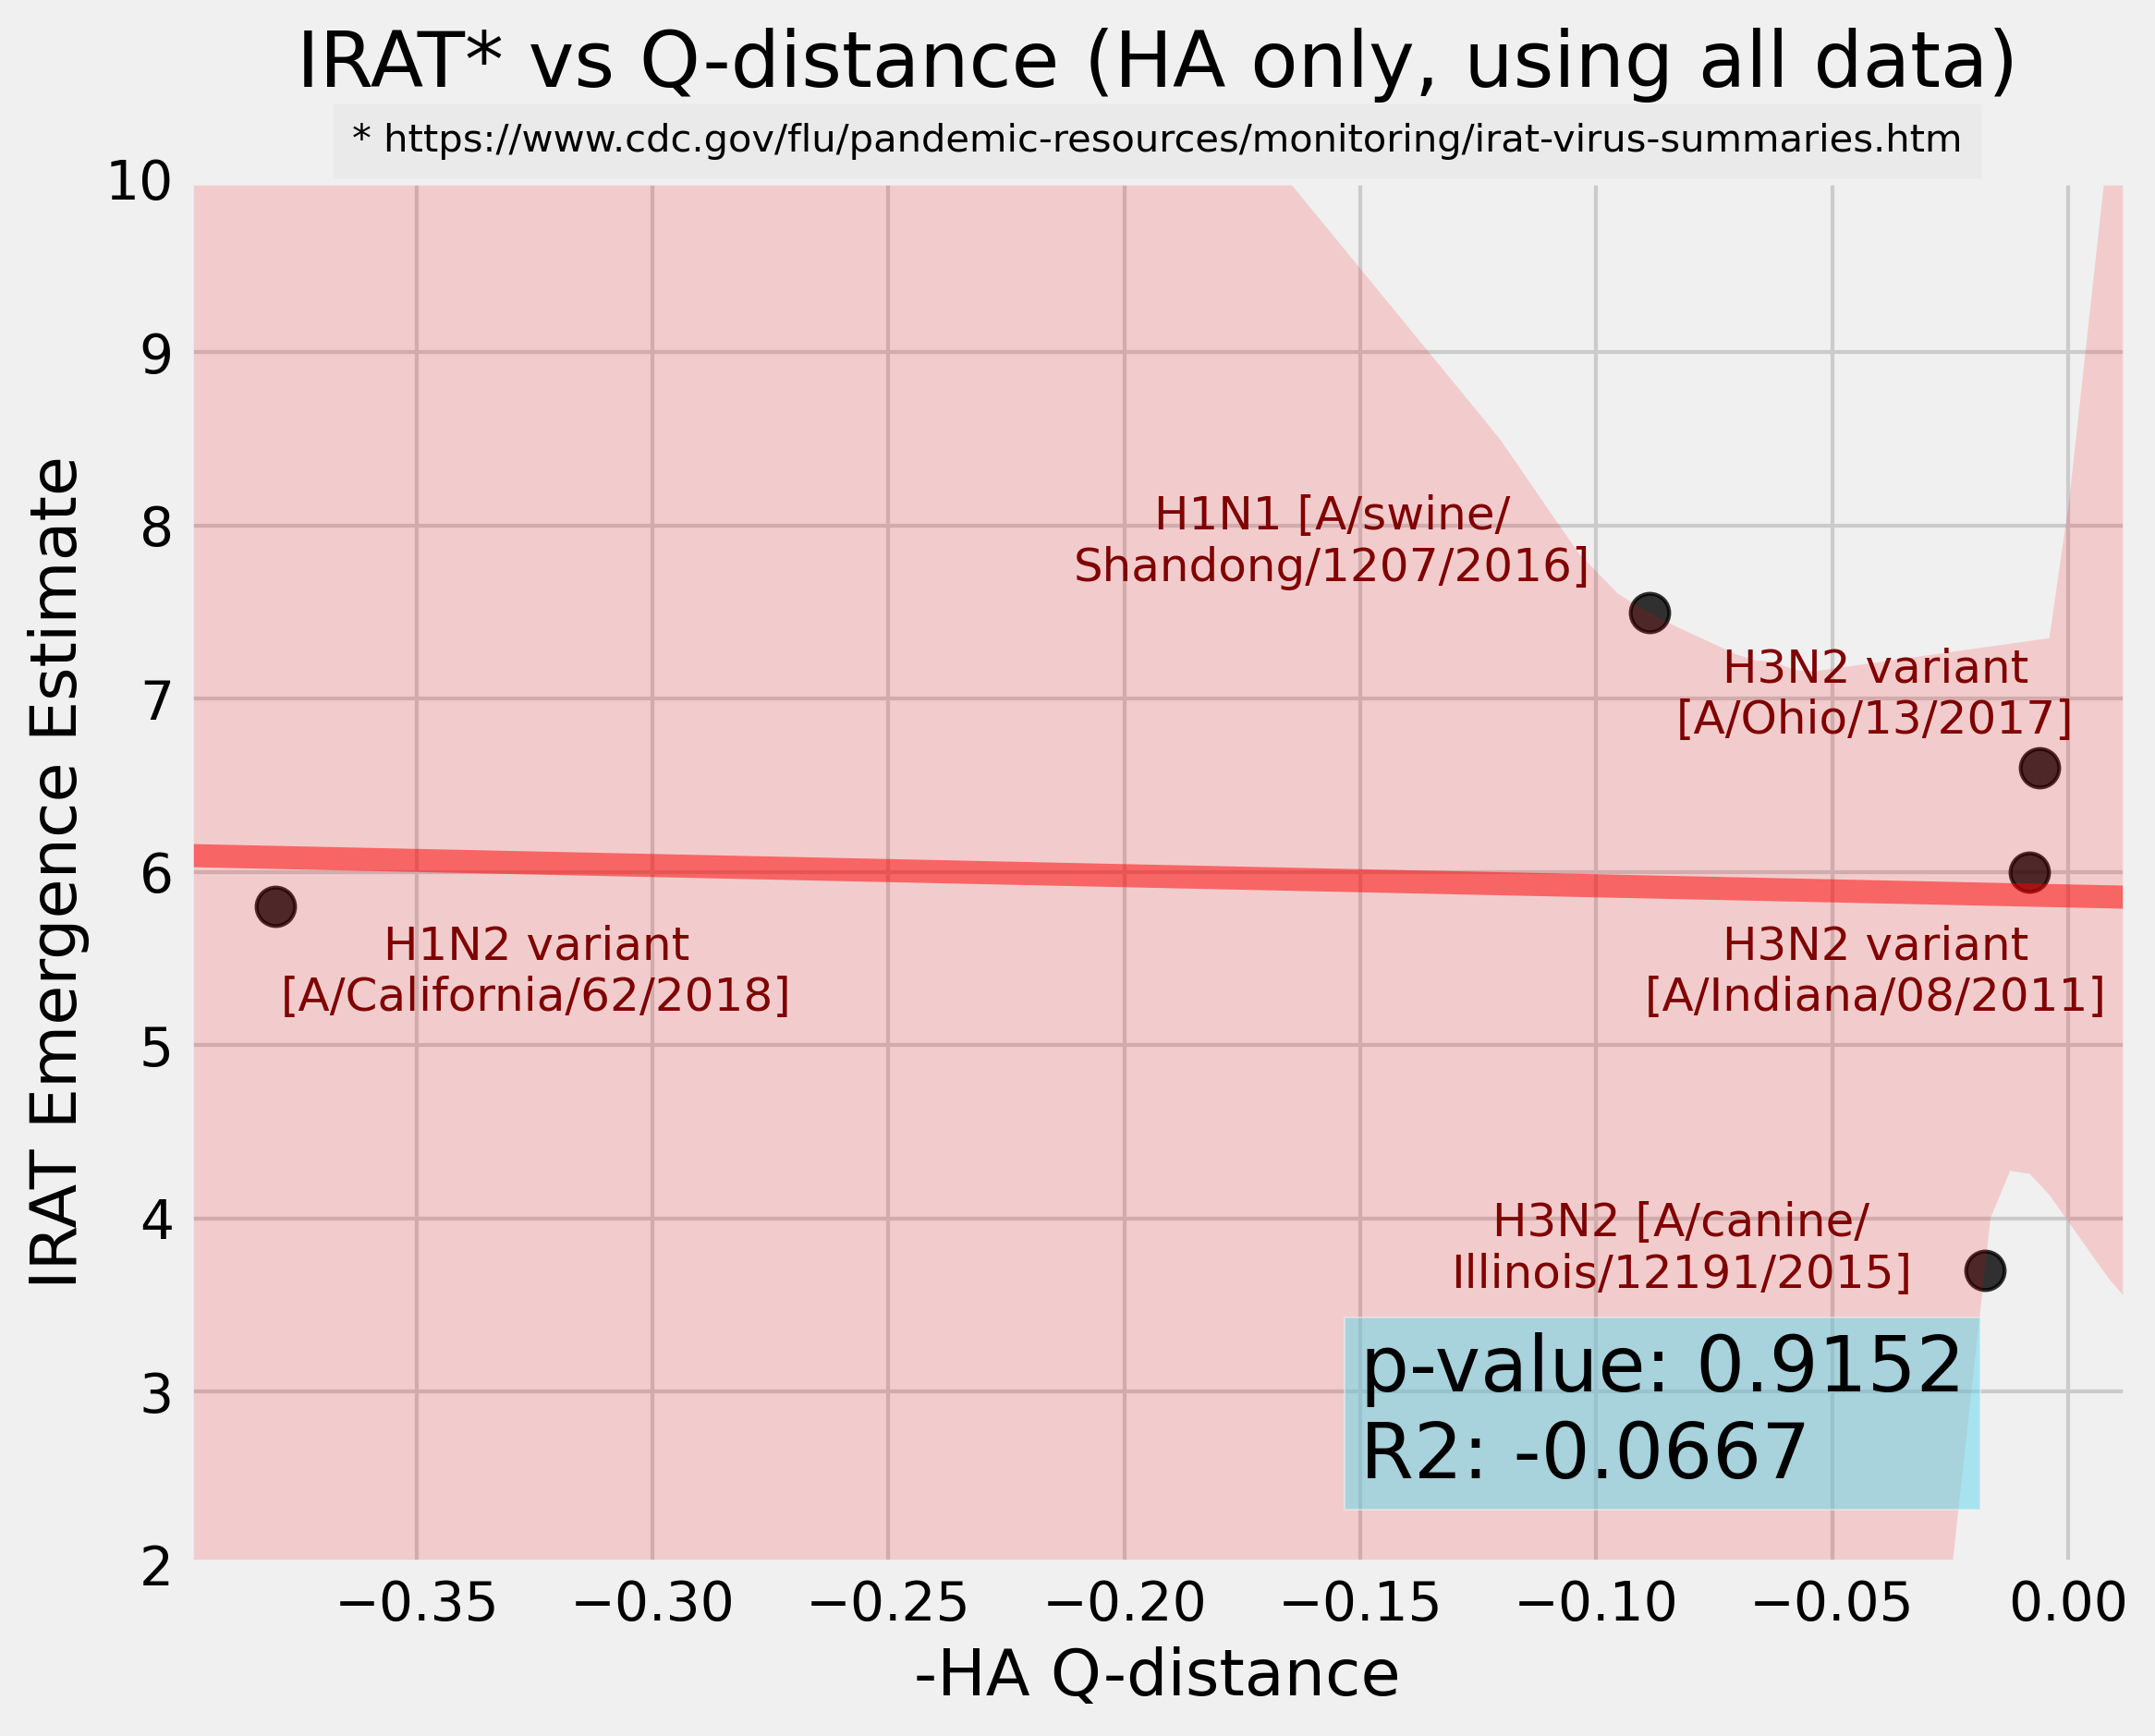

In [10]:
X = df[df['HA Average Qdistance'] > 0]['HA Average Qdistance']
Y = df[df['HA Average Qdistance'] > 0]['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-HA Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-HA Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.15, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (HA only, using all data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=10, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.77, 0.2, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.18, 0.4, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.87, 0.4, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.87, 0.6, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.59, 0.71, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_all_sequences_ha',AXIS=True)

In [6]:
coords_df = df[['Influenza Virus','Virus Type','HA Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['HA Average Qdistance'] = -coords_df['HA Average Qdistance']
coords_df.iloc[1:]

,Influenza Virus,Virus Type,HA Average Qdistance,Potential Emergence Estimate
5,A/canine/Illinois/12191/2015,H3N2,-0.017681,3.7
2,A/California/62/2018,H1N2,-0.379929,5.8
4,A/Indiana/08/2011,H3N2,-0.008264,6.0
3,A/Ohio/13/2017,H3N2,-0.006036,6.6
0,A/swine/Shandong/1207/2016,H1N1,-0.088669,7.5


## NA Only

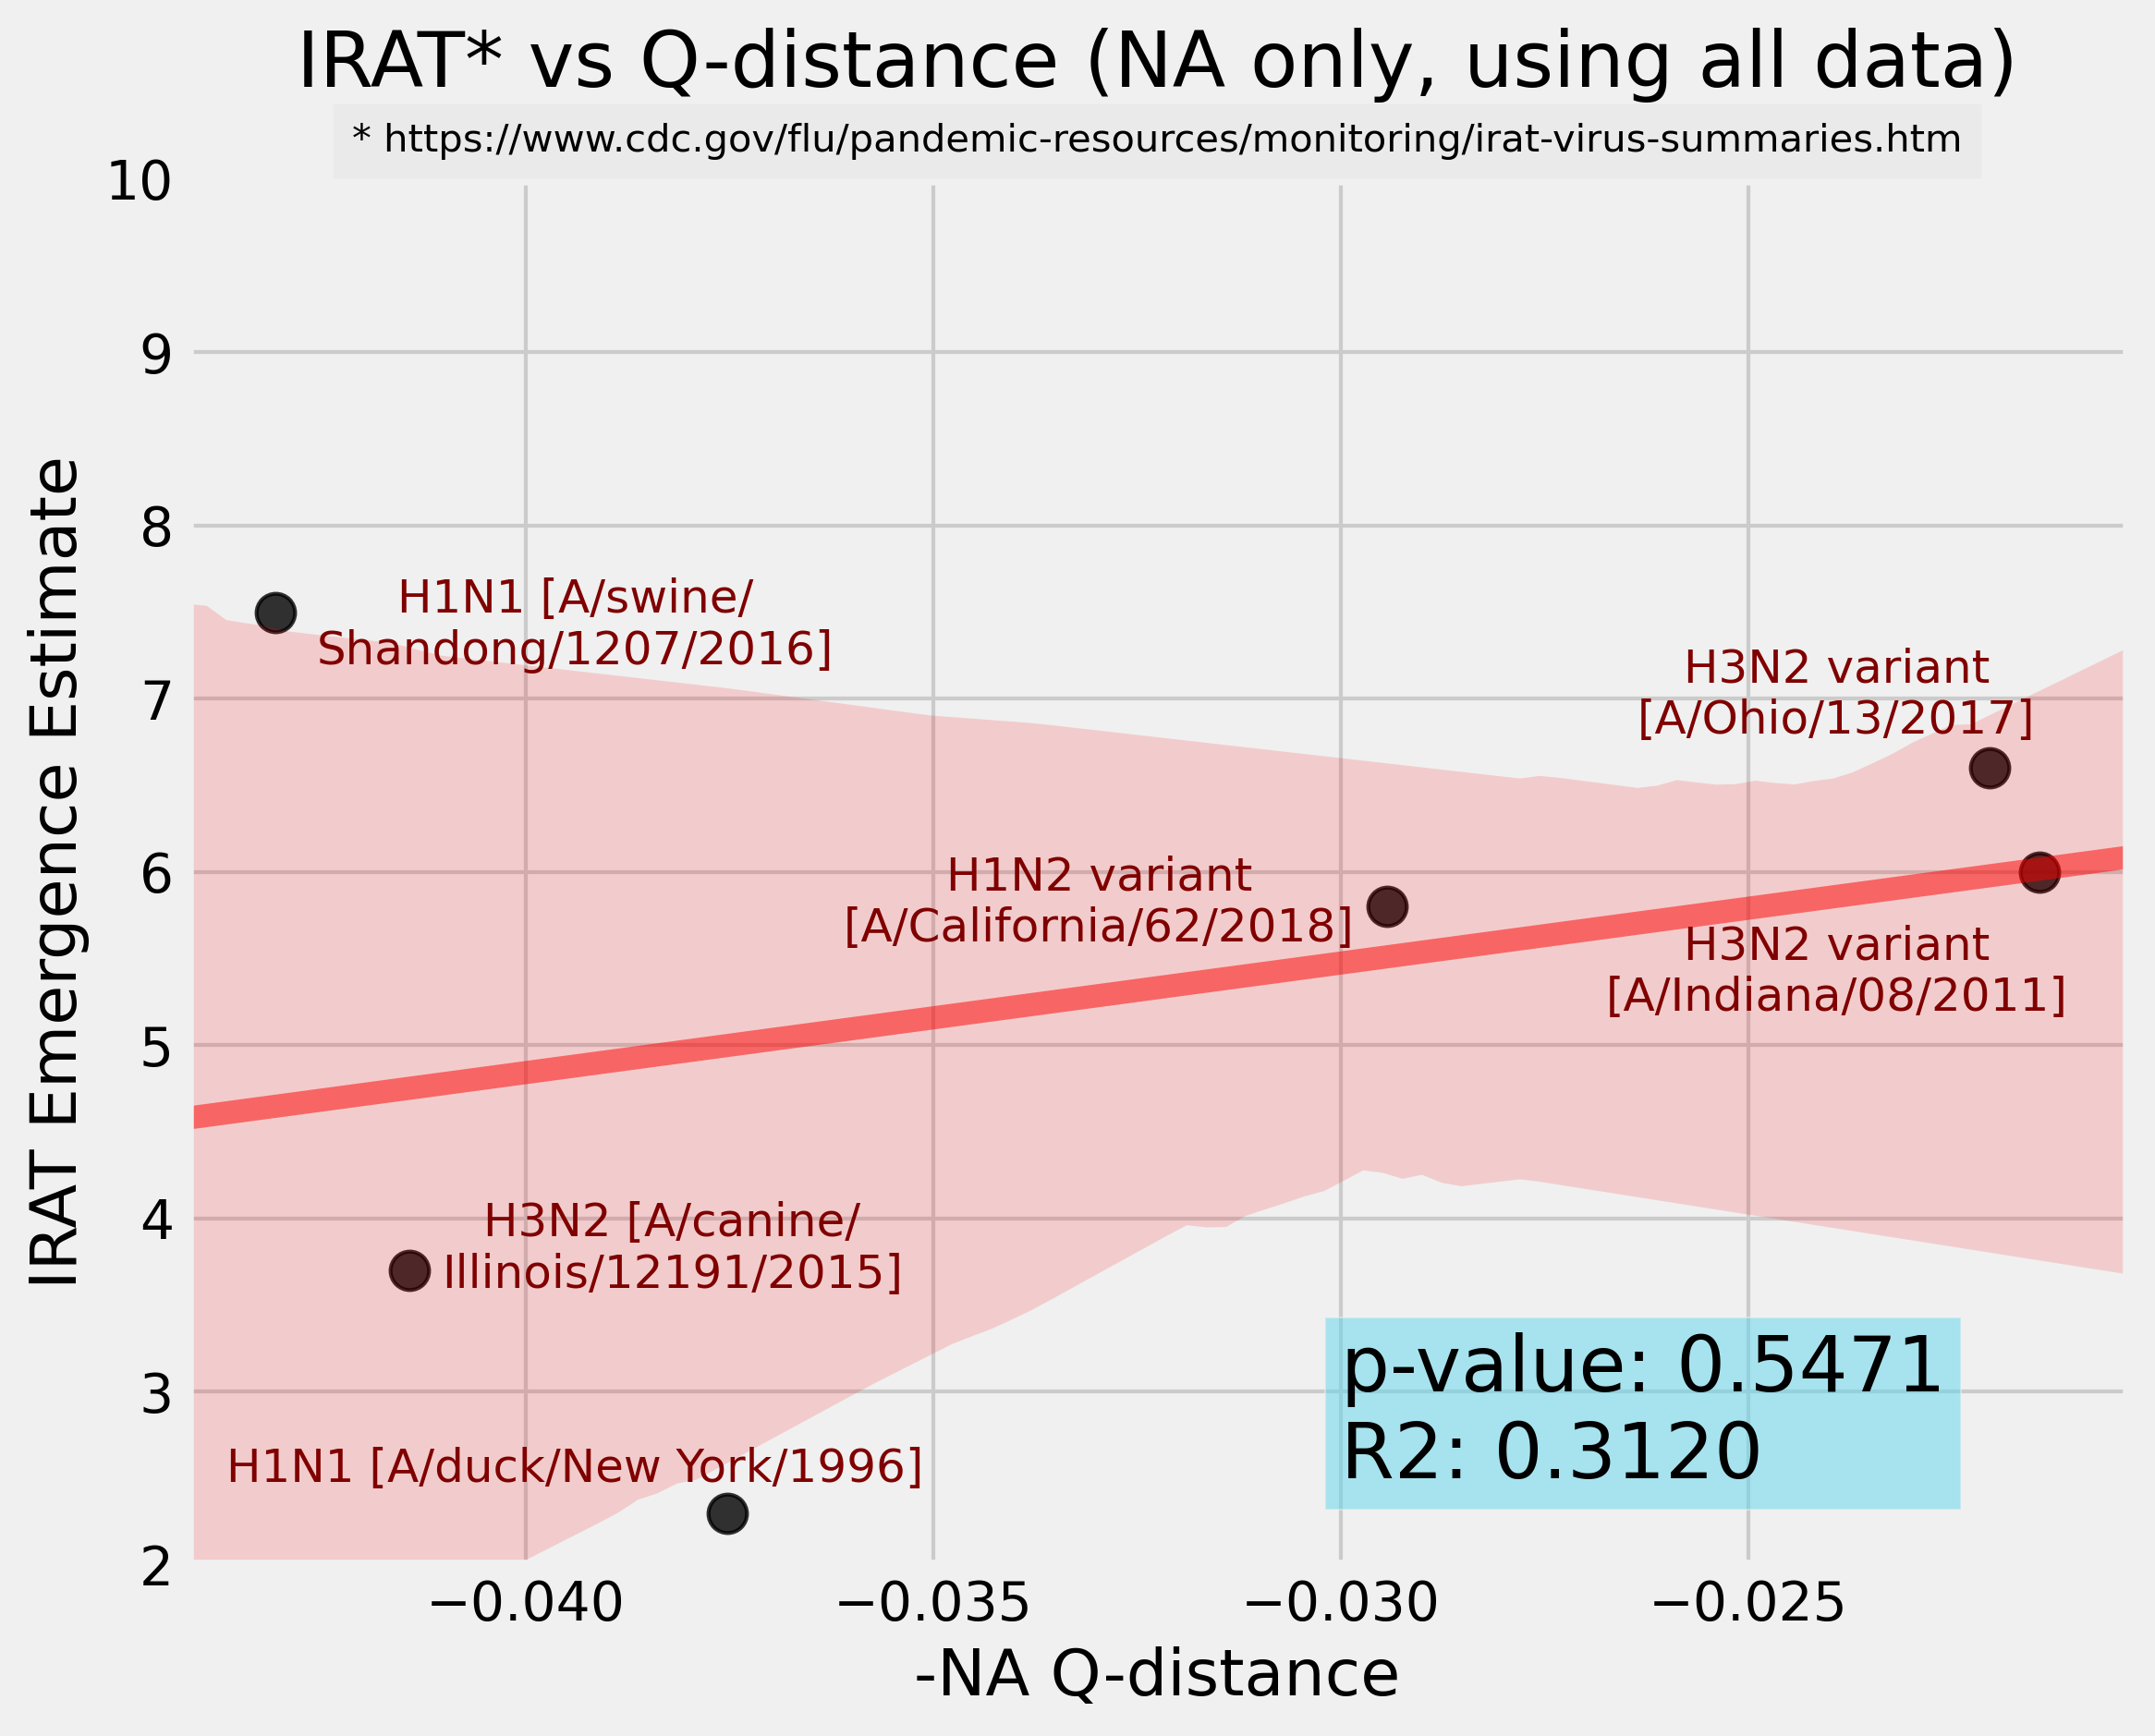

In [9]:
X = df[df['NA Average Qdistance'] > 0]['NA Average Qdistance']
Y = df[df['NA Average Qdistance'] > 0]['Potential Emergence Estimate']

slope, intercept, r, p, std_err = stats.linregress(-np.array(X), Y)

DF = pd.DataFrame([-np.array(X), Y]).transpose()
DF.columns = ['-NA Q-distance','IRAT Emergence Estimate']
ax = sns.regplot(x='-NA Q-distance', y='IRAT Emergence Estimate', data=DF, scatter_kws={"color": "black","s":100}, 
                 line_kws={"color": "red","alpha":.5}, truncate=False)
plt.text(-0.03, 2.5, "p-value: {:5.4f}\nR2: {:5.4f}".format(p, r), bbox=dict(facecolor='#5fd8ed', alpha=0.5), fontsize=20);
plt.ylim(2, 10)
ax.set_title('IRAT* vs Q-distance (NA only, using all data)',y=1.05)
plt.figtext(0.5, 1.02, "* https://www.cdc.gov/flu/pandemic-resources/monitoring/irat-virus-summaries.htm", 
            ha="center", fontsize=10, bbox={"facecolor":".9", "alpha":0.5, "pad":5});

plt.figtext(0.2, 0.06, "H1N1 [A/duck/New York/1996]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.25, 0.2, "H3N2 [A/canine/\nIllinois/12191/2015]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.47, 0.45, "H1N2 variant\n[A/California/62/2018]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.4, "H3N2 variant\n[A/Indiana/08/2011]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.85, 0.6, "H3N2 variant\n[A/Ohio/13/2017]", ha="center", fontsize=12, color='maroon');
plt.figtext(0.2, 0.65, "H1N1 [A/swine/\nShandong/1207/2016]", ha="center", fontsize=12, color='maroon');

save_fig('figures/irat_combined_all_sequences_ha',AXIS=True)

In [8]:
coords_df = df[['Influenza Virus','Virus Type','NA Average Qdistance','Potential Emergence Estimate']].sort_values('Potential Emergence Estimate')
coords_df['NA Average Qdistance'] = -coords_df['NA Average Qdistance']
coords_df

,Influenza Virus,Virus Type,NA Average Qdistance,Potential Emergence Estimate
1,A/duck/New York/1996,H1N1,-0.037525,2.3
5,A/canine/Illinois/12191/2015,H3N2,-0.041427,3.7
2,A/California/62/2018,H1N2,-0.029437,5.8
4,A/Indiana/08/2011,H3N2,-0.021427,6.0
3,A/Ohio/13/2017,H3N2,-0.022038,6.6
0,A/swine/Shandong/1207/2016,H1N1,-0.043072,7.5
